In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

In [2]:
application_data = pd.read_csv('C:/Users/maity/OneDrive/Desktop/darkArmy/bank03/app.csv')
previous_application = pd.read_csv('C:/Users/maity/OneDrive/Desktop/darkArmy/bank03/previous_application.csv')
columns_description = pd.read_csv('C:/Users/maity/OneDrive/Desktop/darkArmy/bank03/column.csv',skiprows=1)

In [4]:
application_data.shape


(307511, 122)

In [6]:
previous_application.shape

(1670214, 37)

In [7]:
columns_description.shape

(159, 5)

In [8]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
display("columns_description")
columns_description=columns_description.drop(['1'],axis=1)
display(columns_description)

'columns_description'

,application_data,SK_ID_CURR,ID of loan in our sample,Unnamed: 4
0,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
1,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
2,application_data,CODE_GENDER,Gender of the client,NaN
3,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
4,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
...,...,...,...,...
154,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
155,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
156,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
157,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


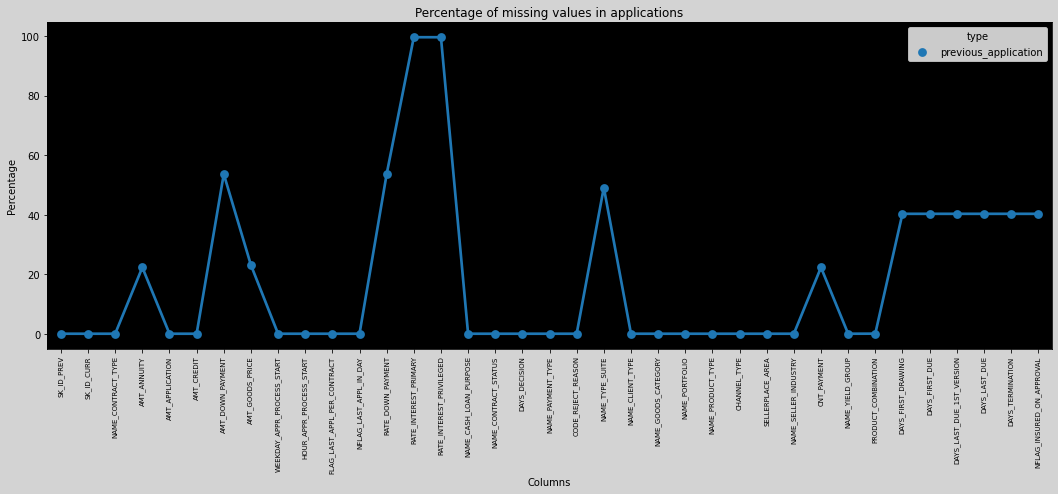

In [12]:
fig = plt.figure(figsize=(18,6))
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application["type"]="previous_application"
ax = sns.pointplot("index",0,data=miss_previous_application,hue="type")
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of missing values in applications")
plt.ylabel("Percentage")
plt.xlabel("Columns")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [13]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [14]:
previous_application = previous_application.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],axis=1)

In [15]:
previous_application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

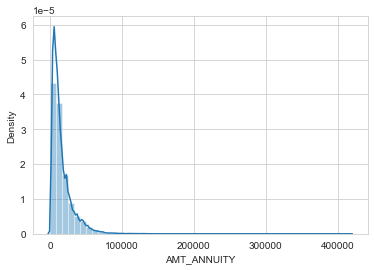

In [16]:
sns.set_style('whitegrid')
sns.distplot(previous_application['AMT_ANNUITY']) 
plt.show()

In [17]:
print("AMT_GOODS_PRICE NULL COUNT:" ,previous_application['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE NULL COUNT: 385515


In [18]:
previous_application['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [19]:
print("NAME_TYPE_SUITE NULL COUNT:" ,previous_application['NAME_TYPE_SUITE'].isnull().sum())

NAME_TYPE_SUITE NULL COUNT: 820405


In [20]:
previous_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

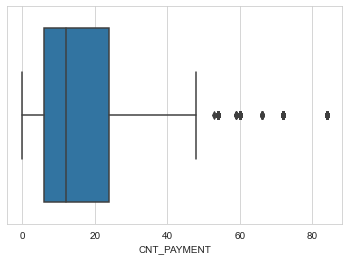

In [21]:
sns.set_style('whitegrid')
sns.boxplot(previous_application['CNT_PAYMENT']) 
plt.show()

In [22]:
print("DAYS_FIRST_DRAWING :",previous_application['CNT_PAYMENT'].isnull().sum())

DAYS_FIRST_DRAWING : 372230


In [23]:
previous_application['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

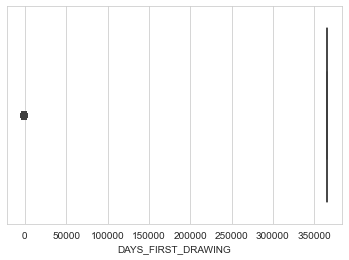

In [24]:
sns.set_style('whitegrid')
sns.boxplot(previous_application['DAYS_FIRST_DRAWING'])
plt.show()

In [25]:
print("DAYS_FIRST_DUE :" ,previous_application['DAYS_FIRST_DUE'].isnull().sum())


DAYS_FIRST_DUE : 673065


In [26]:
previous_application['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

In [27]:
print("NFLAG_INSURED_ON_APPROVAL:" ,previous_application['NFLAG_INSURED_ON_APPROVAL'].isnull().sum())


NFLAG_INSURED_ON_APPROVAL: 673065


In [28]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [29]:
previous_application.isnull().sum()


SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

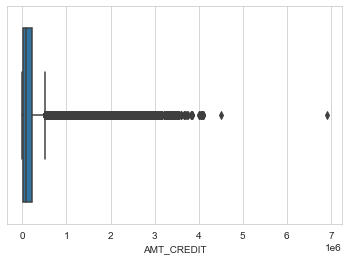

In [30]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['AMT_CREDIT']) 
plt.show()

In [31]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [32]:
application_data=application_data.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

In [33]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum())*100application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey"))

SyntaxError: invalid syntax (Temp/ipykernel_2300/240689750.py, line 2)

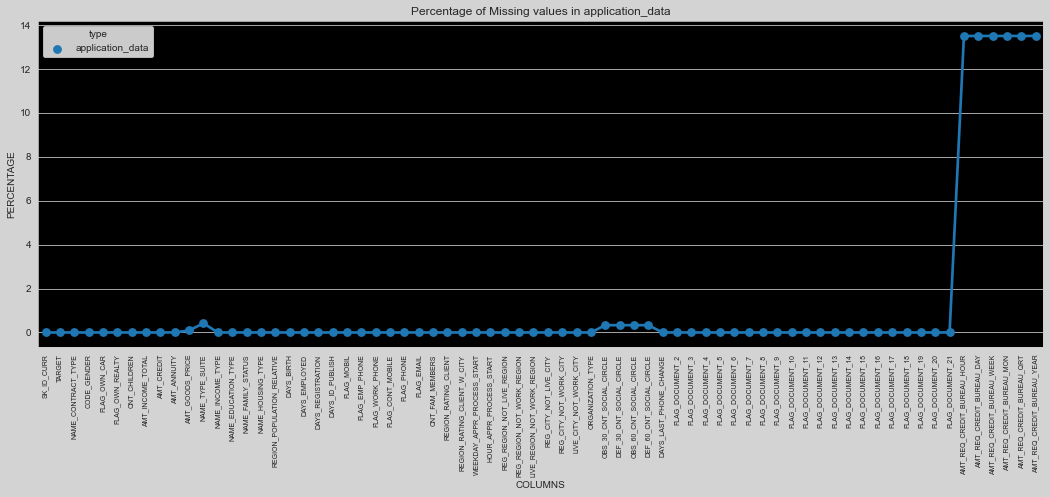

In [34]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [35]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 70, dtype: float64

In [36]:
print("AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT : 41519


In [37]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()


count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [38]:
print("AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())


AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT : 41519


In [39]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()


count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [40]:
print("AMT_REQ_CREDIT_BUREAU_MON NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())


AMT_REQ_CREDIT_BUREAU_MON NAN COUNT : 41519


In [41]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()


count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [42]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()


count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [43]:
print("AMT_REQ_CREDIT_BUREAU_WEEK NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())


AMT_REQ_CREDIT_BUREAU_WEEK NAN COUNT : 41519


In [44]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()


count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [45]:
print("AMT_REQ_CREDIT_BUREAU_YEAR NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())


AMT_REQ_CREDIT_BUREAU_YEAR NAN COUNT : 41519


In [46]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()


count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [47]:
print("DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT :" ,application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())


DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT : 1021


In [48]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()


count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [49]:
print("DEF_30_CNT_SOCIAL_CIRCLE :" ,application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())


DEF_30_CNT_SOCIAL_CIRCLE : 1021


In [50]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()


count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [51]:
print("OBS_60_CNT_SOCIAL_CIRCLE :" ,application_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())


OBS_60_CNT_SOCIAL_CIRCLE : 1021


In [52]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()


count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [53]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()


count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [54]:
application_data.isnull().sum()


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 70, dtype: int64

In [55]:
print("AMT_ANNUITY  :" ,application_data['AMT_ANNUITY'].isnull().sum())


AMT_ANNUITY  : 12


In [56]:
application_data['AMT_ANNUITY'].describe()


count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

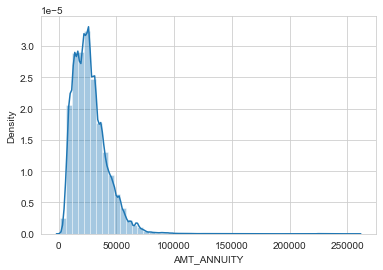

In [57]:
sns.set_style('whitegrid') 
sns.distplot(application_data['AMT_ANNUITY']) 
plt.show()

In [58]:
print("AMT_GOODS_PRICE   :" ,application_data['AMT_GOODS_PRICE'].isnull().sum())


AMT_GOODS_PRICE   : 278


In [59]:
application_data['AMT_GOODS_PRICE'].describe()


count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

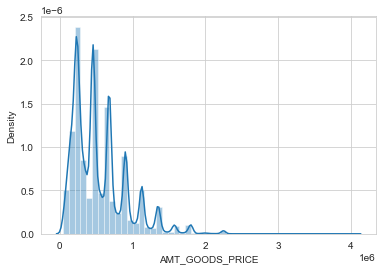

In [60]:
sns.set_style('whitegrid') 
sns.distplot(application_data['AMT_GOODS_PRICE']) 
plt.show()

In [61]:
print("NAME_TYPE_SUITE :" ,application_data['NAME_TYPE_SUITE'].isnull().sum())


NAME_TYPE_SUITE : 1292


In [62]:
application_data['NAME_TYPE_SUITE'].value_counts()


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [63]:
print("CNT_FAM_MEMBERS :" ,application_data['CNT_FAM_MEMBERS'].isnull().sum())


CNT_FAM_MEMBERS : 2


In [64]:
application_data['CNT_FAM_MEMBERS'].describe()


count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

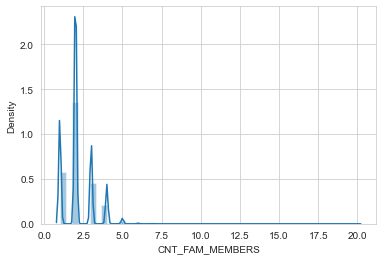

In [65]:
sns.set_style('whitegrid') 
sns.distplot(application_data['CNT_FAM_MEMBERS']) 
plt.show()

In [66]:
print("DAYS_LAST_PHONE_CHANGE :" ,application_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum())


DAYS_LAST_PHONE_CHANGE : 1


In [67]:
application_data['DAYS_LAST_PHONE_CHANGE'].describe()


count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [68]:
import statistics 
statistics.mode(application_data['DAYS_LAST_PHONE_CHANGE'])

0.0

In [69]:
print(type(application_data.info()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [70]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])

In [71]:
display("application_data")
display(application_data.head())

'application_data'

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
obj_dtypes = [i for i in application_data.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in application_data.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [73]:
print(color.BOLD + color.PURPLE + 'Categorical Columns' + color.END, "\n")
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])

Categorical Columns 

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE


In [74]:
print(color.BOLD + color.PURPLE +"Numerical Columns" + color.END, "\n")
for x in range(len(num_dtypes)): 
    print(num_dtypes[x])

Numerical Columns 

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU

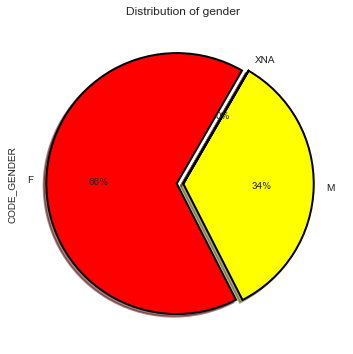

In [75]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
application_data["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

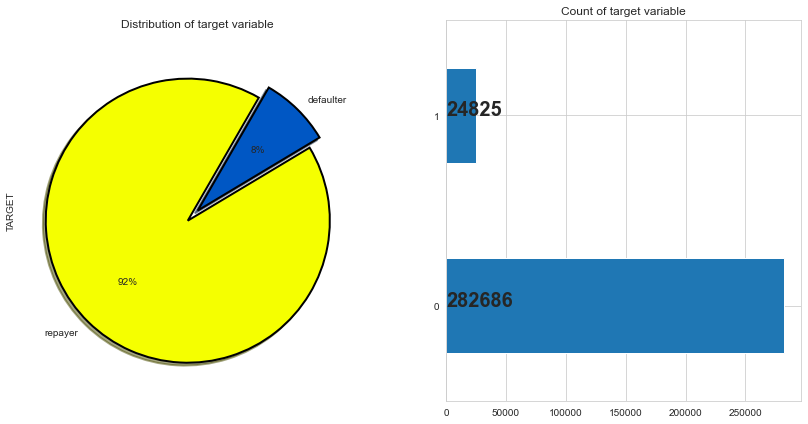

In [76]:
plt.figure(figsize=(14,7))
plt.subplot(121)
application_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = application_data["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(application_data["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

In [77]:
application_data_x = application_data[[x for x in application_data.columns if x not in ["TARGET"]]]
previous_application_x = previous_application[[x for x in previous_application.columns if x not in ["TARGET"]]]
application_data_x["type"] = "application_data"
previous_application_x["type"] = "previous_application"
data = pd.concat([application_data_x,previous_application_x],axis=0) 

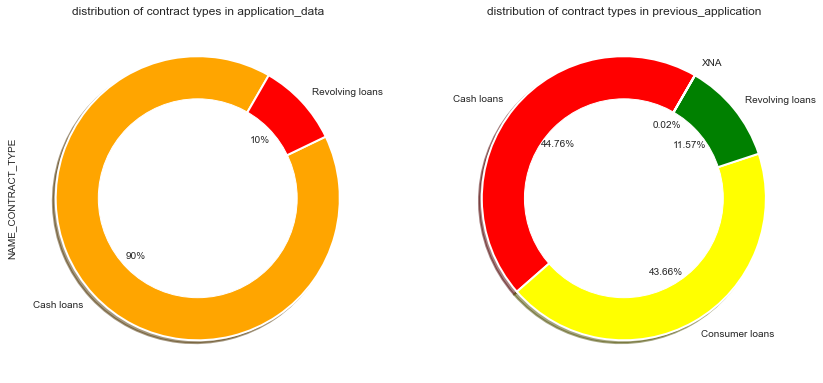

In [78]:
plt.figure(figsize=(14,7))
plt.subplot(121)
data[data["type"] == "application_data"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orange","red"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("distribution of contract types in application_data")

plt.subplot(122)
data[data["type"] == "previous_application"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.2f%%",colors = ["red","yellow","green",'BLACK'],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.ylabel("")
plt.title("distribution of contract types in previous_application")
plt.show()

plt.show()

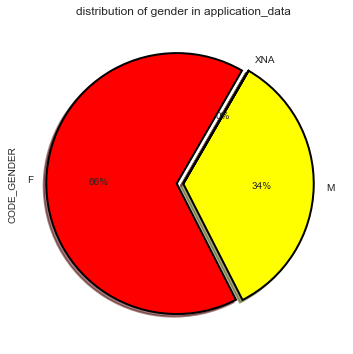

In [79]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
data[data["type"] == "application_data"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of gender in application_data")
plt.show()

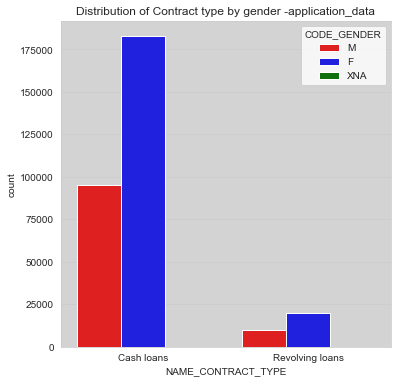

In [80]:
fig  = plt.figure(figsize=(13,6))
plt.subplot(121)
ax = sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=data[data["type"] == "application_data"],palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender -application_data")


plt.show()

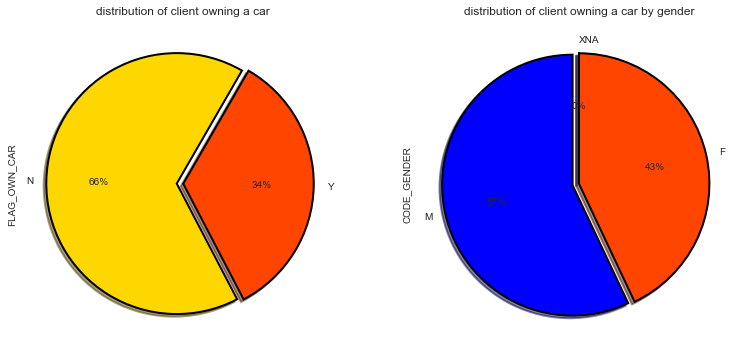

In [82]:
fig = plt.figure(figsize=(13,6))

plt.subplot(121)
data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["gold","orangered"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("distribution of client owning a car")

plt.subplot(122)
data[data["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["b","orangered"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of client owning a car by gender")

plt.show()

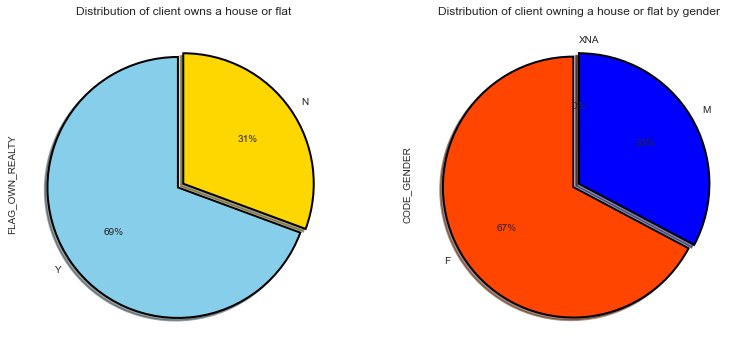

In [83]:
plt.figure(figsize=(13,6))
plt.subplot(121)
data["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0],shadow =True)
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
data[data["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orangered","b"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of client owning a house or flat by gender")
plt.show()

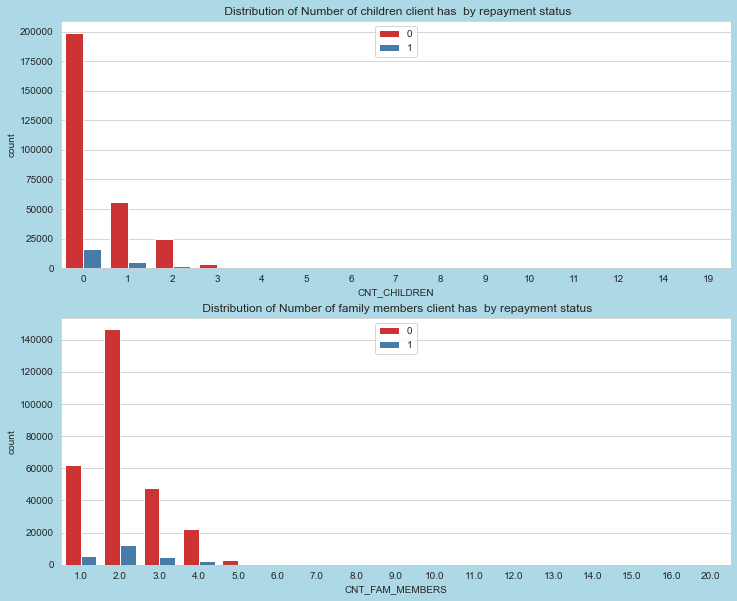

In [84]:
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(application_data["CNT_CHILDREN"],palette="Set1",hue=application_data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of children client has  by repayment status")
plt.subplot(212)
sns.countplot(application_data["CNT_FAM_MEMBERS"],palette="Set1",hue=application_data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")
fig.set_facecolor("lightblue")

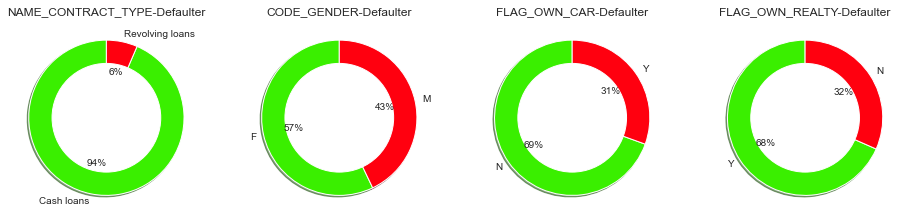

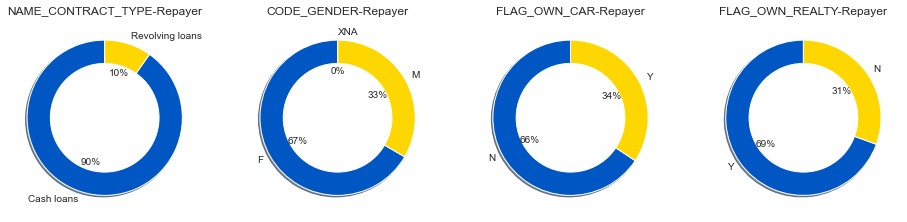

In [85]:
default = application_data[application_data["TARGET"]==1][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
non_default = application_data[application_data["TARGET"]==0][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")


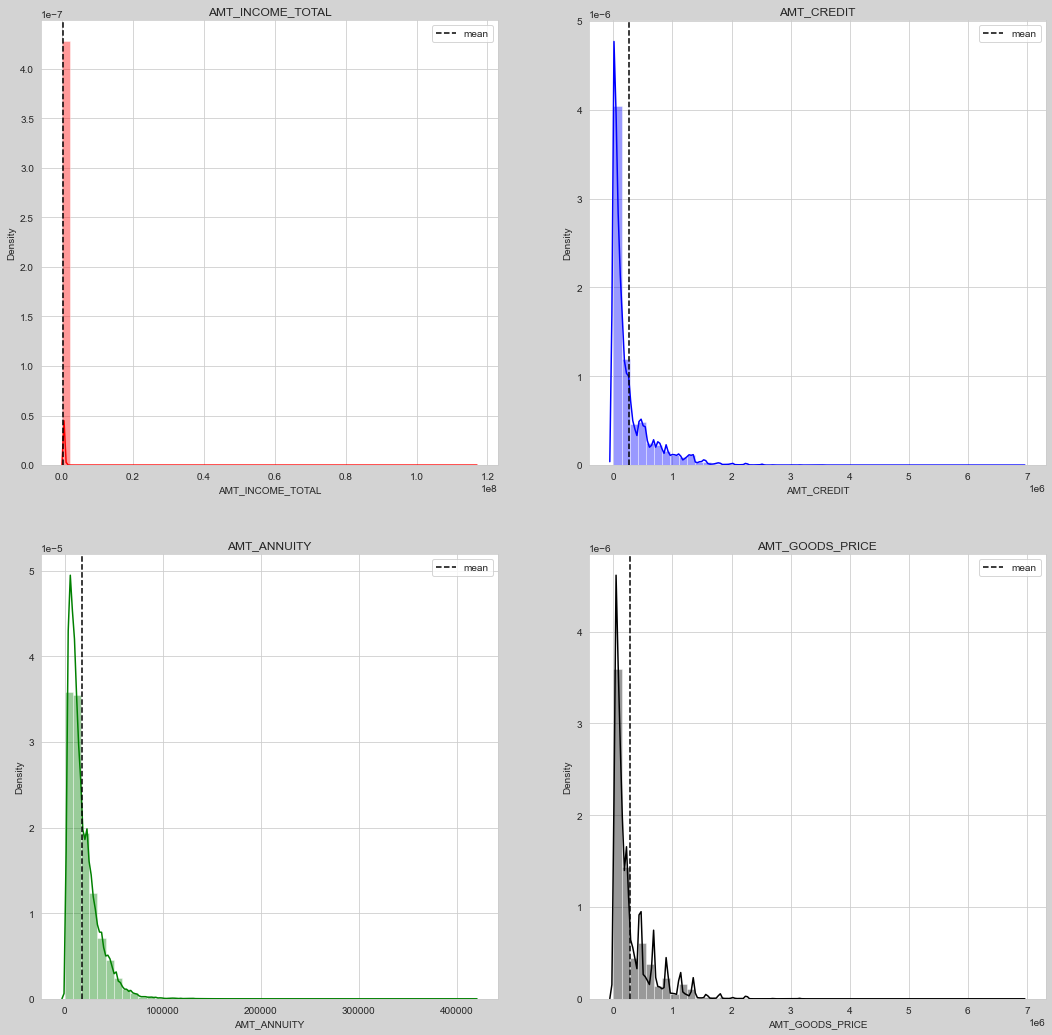

In [86]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']
length = len(cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(18,18))
ax.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(data[data[i].notnull()][i],color=k)
    plt.axvline(data[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)

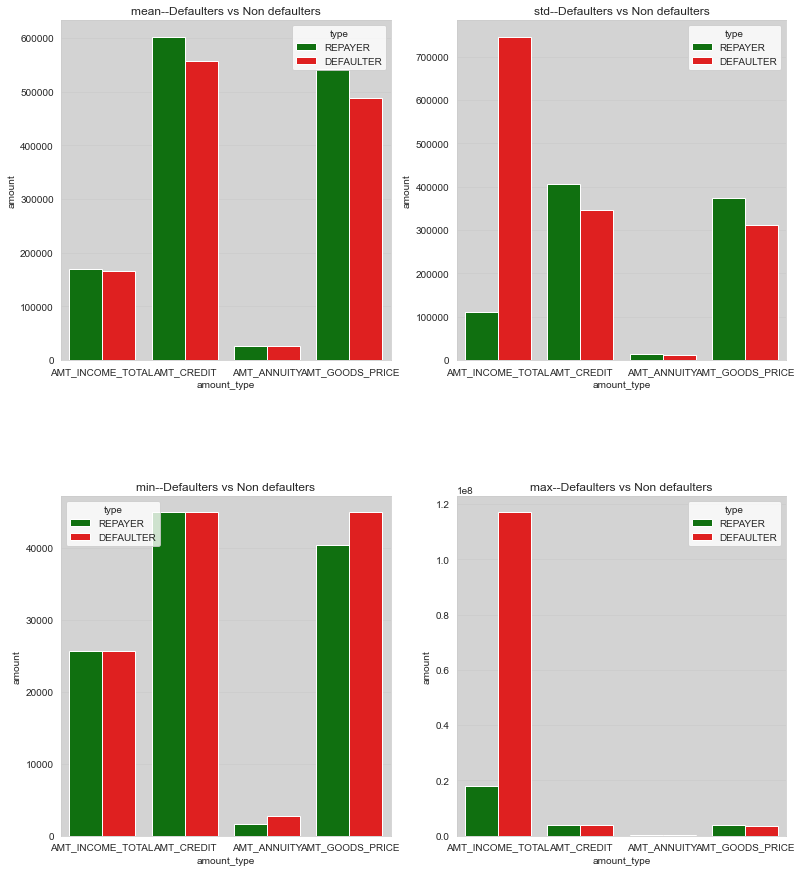

In [87]:
df = application_data.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 
df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x,df_y],axis = 0)

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(13,15))
for i,j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df_new[df_new["statistic"] == i]["amount_type"],df_new[df_new["statistic"] == i]["amount"],
                hue=df_new[df_new["statistic"] == i]["type"],palette=["g","r"])
    plt.title(i + "--Defaulters vs Non defaulters")
    plt.subplots_adjust(hspace = .4)
    fig.set_facecolor("lightgrey")

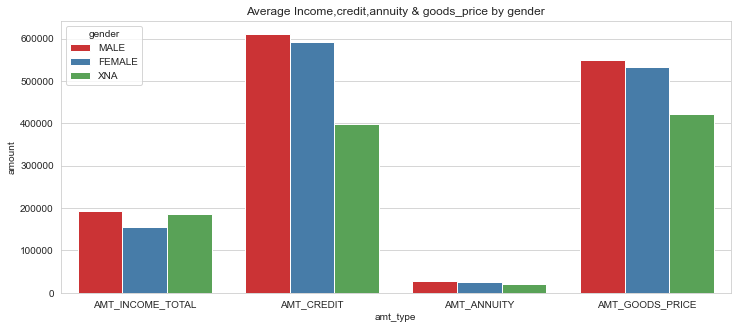

In [88]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

df1 = data.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

df_f   = df1[["index","F"]]
df_f   = df_f.rename(columns={'index':"amt_type", 'F':"amount"})
df_f["gender"] = "FEMALE"
df_m   = df1[["index","M"]]
df_m   = df_m.rename(columns={'index':"amt_type", 'M':"amount"})
df_m["gender"] = "MALE"
df_xna = df1[["index","XNA"]]
df_xna = df_xna.rename(columns={'index':"amt_type", 'XNA':"amount"})
df_xna["gender"] = "XNA"

df_gen = pd.concat([df_m,df_f,df_xna],axis=0)

plt.figure(figsize=(12,5))
ax = sns.barplot("amt_type","amount",data=df_gen,hue="gender",palette="Set1")
plt.title("Average Income,credit,annuity & goods_price by gender")
plt.show()

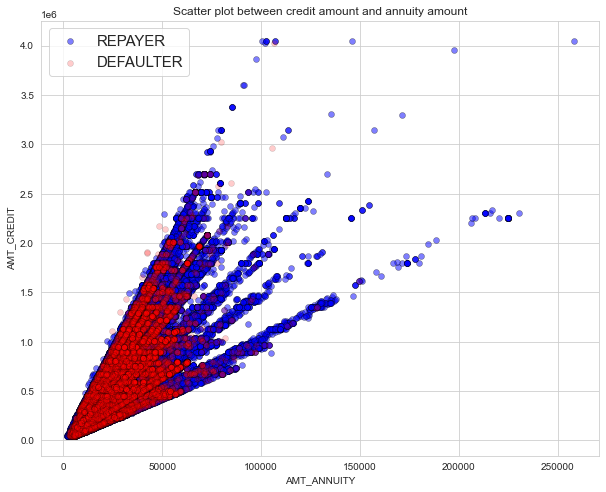

In [89]:
fig = plt.figure(figsize=(10,8))
plt.scatter(application_data[application_data["TARGET"]==0]['AMT_ANNUITY'],application_data[application_data["TARGET"]==0]['AMT_CREDIT'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(application_data[application_data["TARGET"]==1]['AMT_ANNUITY'],application_data[application_data["TARGET"]==1]['AMT_CREDIT'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

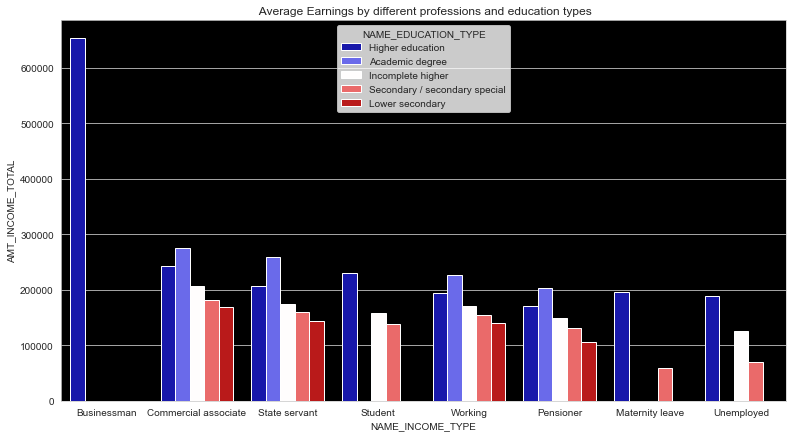

In [91]:
edu = data.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
fig = plt.figure(figsize=(13,7))
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE',palette="seismic")
ax.set_facecolor("k")
plt.title(" Average Earnings by different professions and education types")
plt.show()

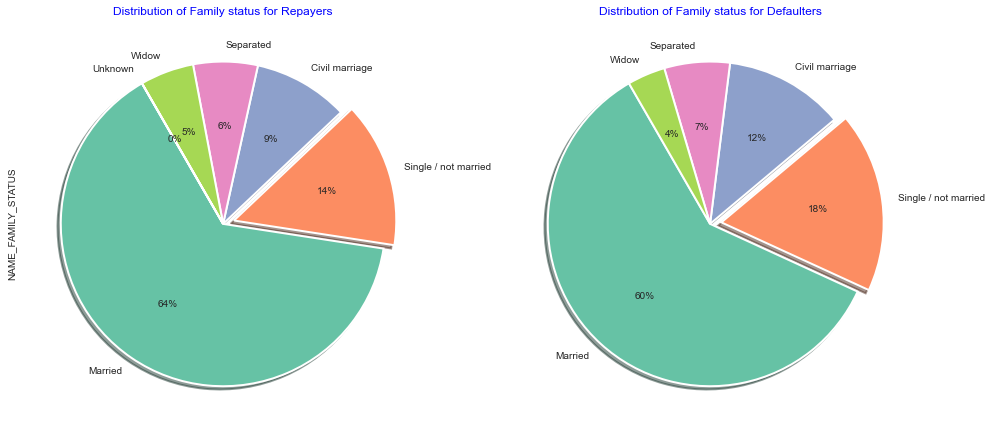

In [92]:
plt.figure(figsize=(16,8))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                             startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0,0])

plt.title("Distribution of Family status for Repayers",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                    startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0])


plt.title("Distribution of Family status for Defaulters",color="b")
plt.ylabel("")
plt.show()

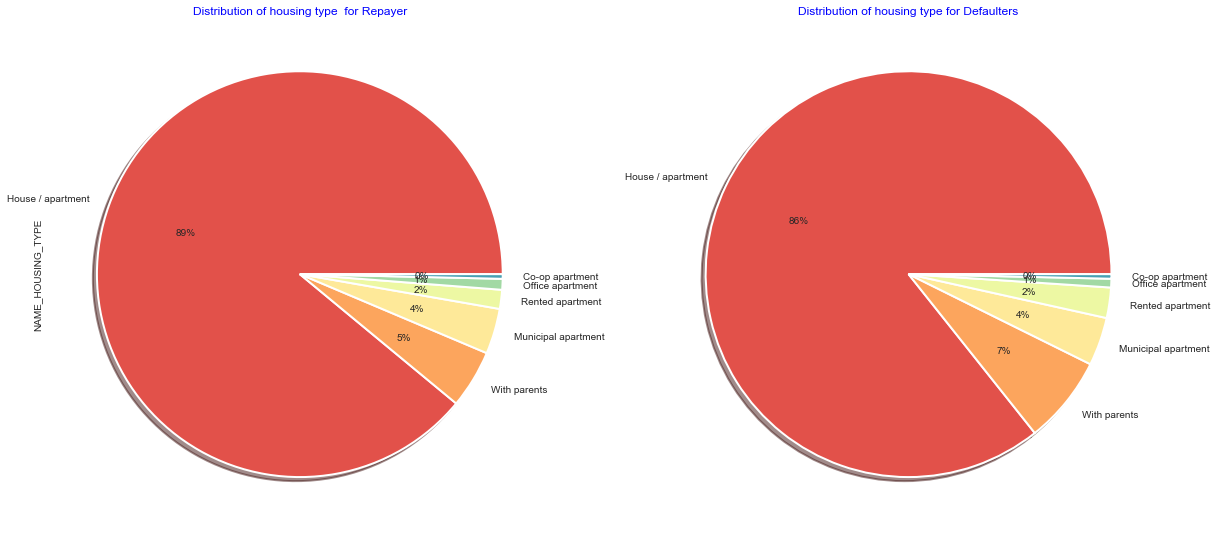

In [93]:
plt.figure(figsize=(20,20))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                             colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of housing type  for Repayer",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                    colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of housing type for Defaulters",color="b")
plt.ylabel("")
plt.show()

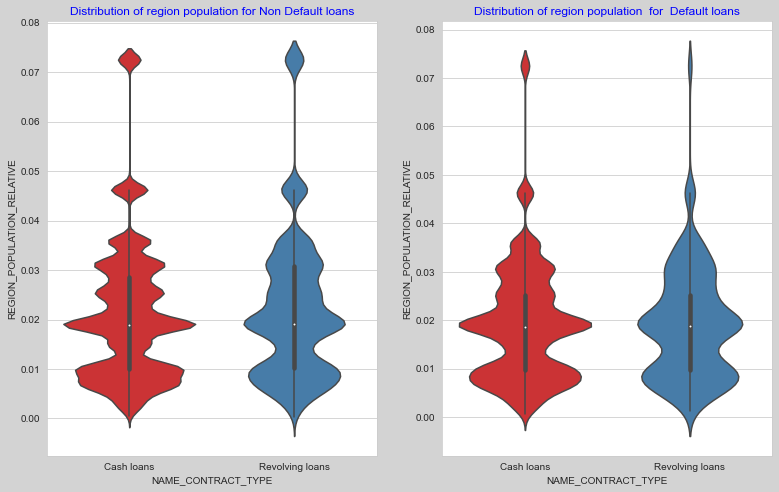

In [94]:
fig = plt.figure(figsize=(13,8))

plt.subplot(121)
sns.violinplot(y=application_data[application_data["TARGET"]==0]["REGION_POPULATION_RELATIVE"]
               ,x=application_data[application_data["TARGET"]==0]["NAME_CONTRACT_TYPE"],
               palette="Set1")
plt.title("Distribution of region population for Non Default loans",color="b")
plt.subplot(122)
sns.violinplot(y = application_data[application_data["TARGET"]==1]["REGION_POPULATION_RELATIVE"]
               ,x=application_data[application_data["TARGET"]==1]["NAME_CONTRACT_TYPE"]
               ,palette="Set1")
plt.title("Distribution of region population  for  Default loans",color="b")

plt.subplots_adjust(wspace = .2)
fig.set_facecolor("lightgrey")

AttributeError: module 'seaborn' has no attribute 'lvplot'

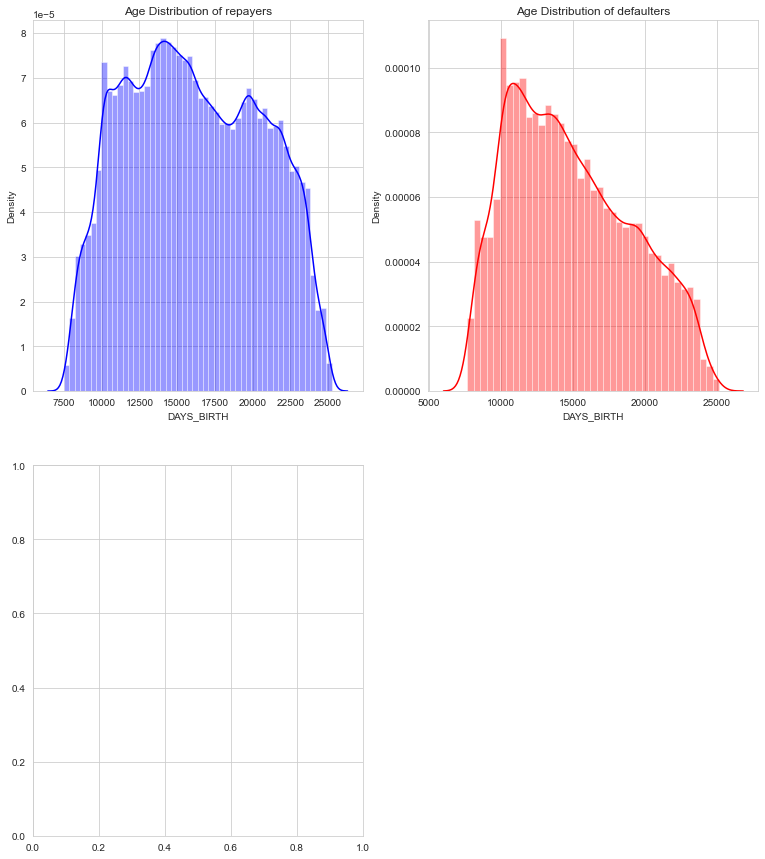

In [96]:
fig = plt.figure(figsize=(13,15))

plt.subplot(221)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_BIRTH"],color="b")
plt.title("Age Distribution of repayers")

plt.subplot(222)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_BIRTH"],color="r")
plt.title("Age Distribution of defaulters")

plt.subplot(223)
sns.lvplot(application_data["TARGET"],application_data["DAYS_BIRTH"],hue=application_data["CODE_GENDER"],palette=["b","grey","m"])
plt.axhline(application_data["DAYS_BIRTH"].mean(),linestyle="dashed",color="k",label ="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=gender)")

plt.subplot(224)
sns.lvplot(application_data["TARGET"],application_data["DAYS_BIRTH"],hue=application_data["NAME_CONTRACT_TYPE"],palette=["r","g"])
plt.axhline(application_data["DAYS_BIRTH"].mean(),linestyle="dashed",color="k",label ="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=contract type)")

plt.subplots_adjust(wspace = .2,hspace = .3)

fig.set_facecolor("lightgrey")

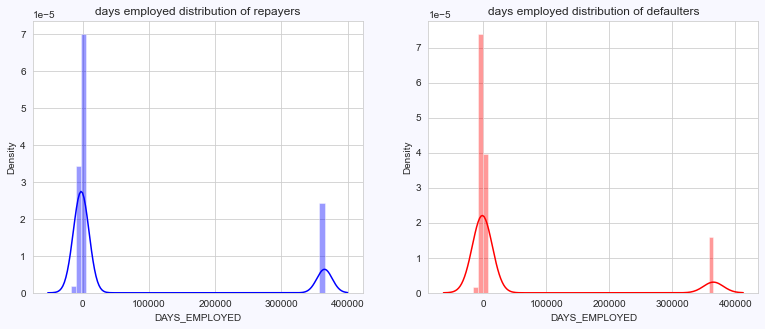

In [97]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_EMPLOYED"],color="b")
plt.title("days employed distribution of repayers")

plt.subplot(122)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_EMPLOYED"],color="r")
plt.title("days employed distribution of defaulters")

fig.set_facecolor("ghostwhite")

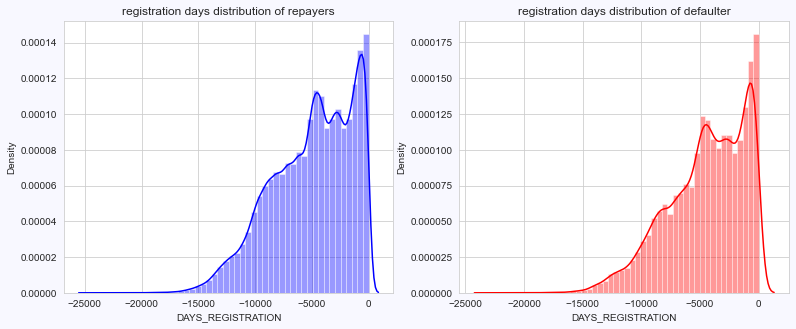

In [98]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_REGISTRATION"],color="b")
plt.title("registration days distribution of repayers")

plt.subplot(122)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_REGISTRATION"],color="r")
plt.title("registration days distribution of defaulter")

fig.set_facecolor("ghostwhite")

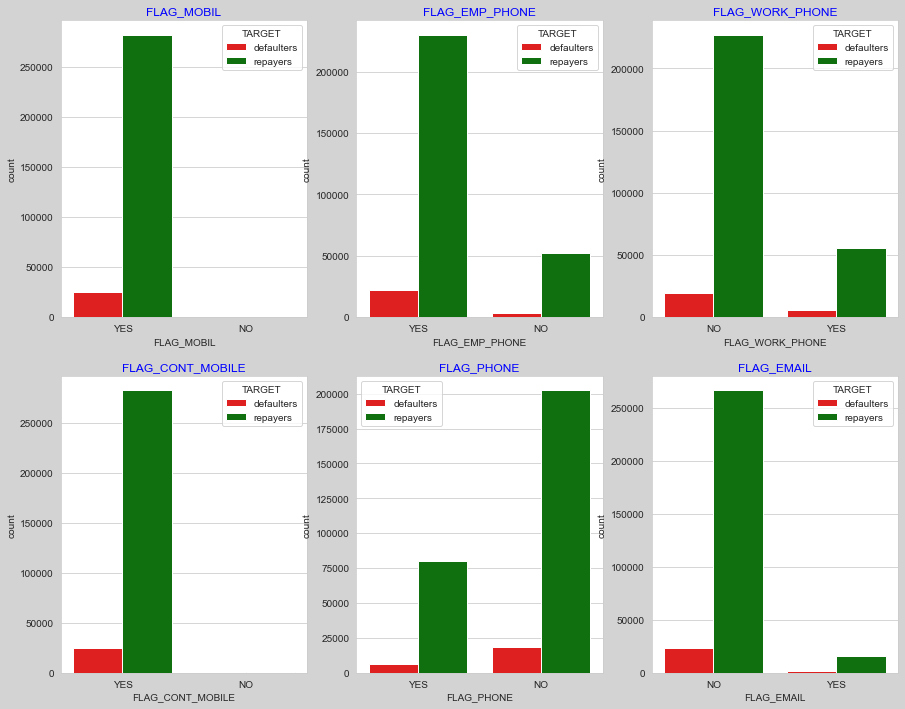

In [99]:
x   = application_data[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL',"TARGET"]]
x["TARGET"] = x["TARGET"].replace({0:"repayers",1:"defaulters"})
x  = x.replace({1:"YES",0:"NO"})

cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']
length = len(cols)

fig = plt.figure(figsize=(15,12))
fig.set_facecolor("lightgrey")

for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(2,3,j+1)
    sns.countplot(x[i],hue=x["TARGET"],palette=["r","g"])
    plt.title(i,color="b")

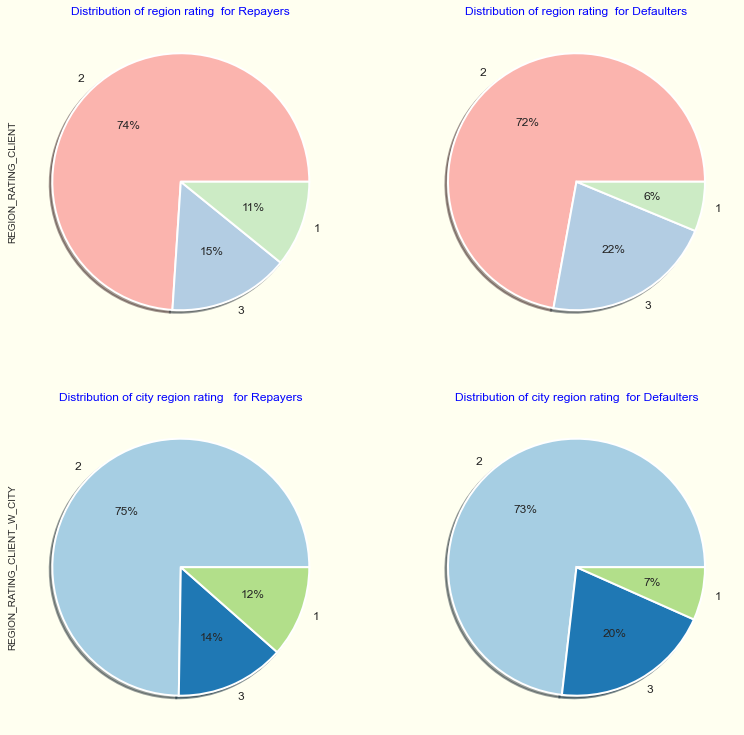

In [100]:
fig = plt.figure(figsize=(13,13))
plt.subplot(221)
application_data[application_data["TARGET"]==0]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of region rating  for Repayers",color="b")

plt.subplot(222)
application_data[application_data["TARGET"]==1]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("Distribution of region rating  for Defaulters",color="b")
plt.ylabel("")

plt.subplot(223)
application_data[application_data["TARGET"]==0]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of city region rating   for Repayers",color="b")

plt.subplot(224)
application_data[application_data["TARGET"]==1]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of city region rating  for Defaulters",color="b")
plt.ylabel("")
fig.set_facecolor("ivory")

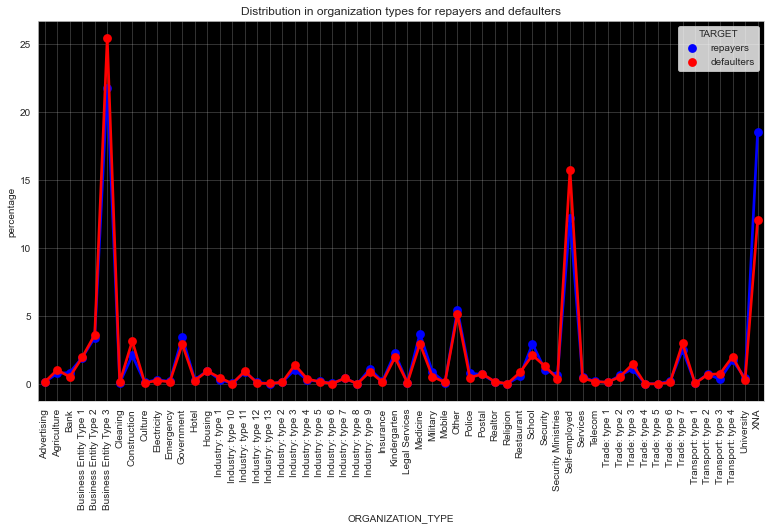

In [104]:
org = application_data.groupby("TARGET").agg({"ORGANIZATION_TYPE":"value_counts"})
org = org.rename(columns = {"ORGANIZATION_TYPE":"value_counts"}).reset_index()
org_0 = org[org["TARGET"] == 0]
org_1 = org[org["TARGET"] == 1]
org_0["percentage"] = org_0["value_counts"]*100/org_0["value_counts"].sum()
org_1["percentage"] = org_1["value_counts"]*100/org_1["value_counts"].sum()

organization = pd.concat([org_0,org_1],axis=0)
organization = organization.sort_values(by="ORGANIZATION_TYPE",ascending=True)

organization["TARGET"] = organization["TARGET"].replace({0:"repayers",1:"defaulters"})

organization
plt.figure(figsize=(13,7))
ax = sns.pointplot("ORGANIZATION_TYPE","percentage",
                   data=organization,hue="TARGET",palette=["b","r"])
plt.xticks(rotation=90)
plt.grid(True,alpha=.3)
ax.set_facecolor("k")
ax.set_title("Distribution in organization types for repayers and defaulters")
plt.show()

AttributeError: module 'seaborn' has no attribute 'lvplot'

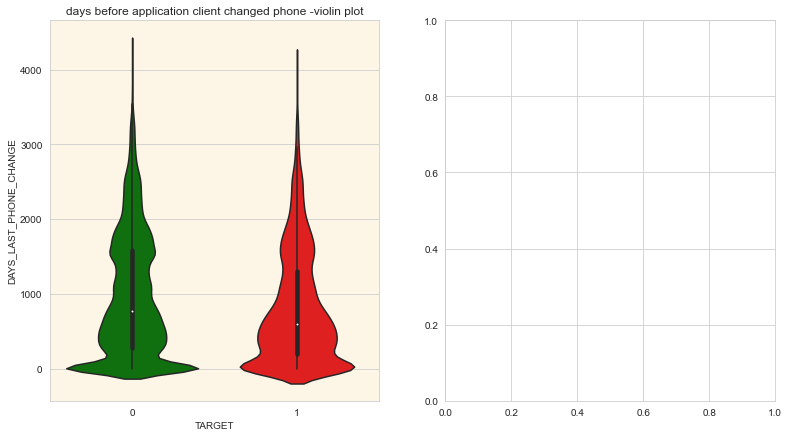

In [107]:
plt.figure(figsize=(13,7))
plt.subplot(121)
ax = sns.violinplot(application_data["TARGET"],
                    application_data["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
ax.set_facecolor("oldlace")
ax.set_title("days before application client changed phone -violin plot")
plt.subplot(122)
ax1 = sns.lvplot(application_data["TARGET"],
                 application_data["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
ax1.set_facecolor("oldlace")
ax1.set_ylabel("")
ax1.set_title("days before application client changed phone -box plot")
plt.subplots_adjust(wspace = .2)

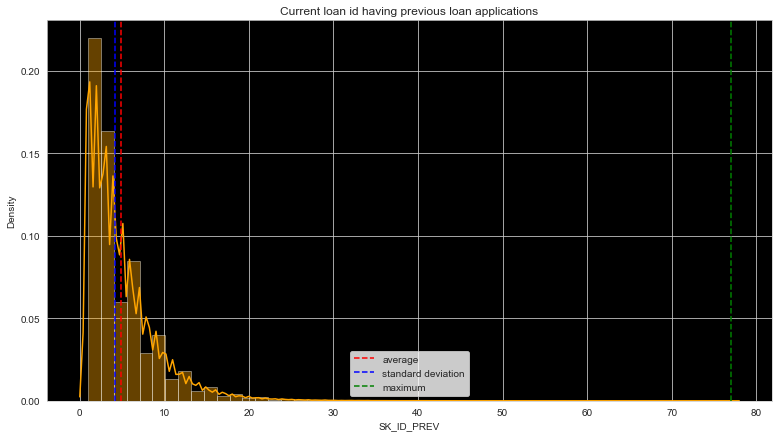

In [108]:
x = previous_application.groupby("SK_ID_CURR")["SK_ID_PREV"].count().reset_index()
plt.figure(figsize=(13,7))
ax = sns.distplot(x["SK_ID_PREV"],color="orange")
plt.axvline(x["SK_ID_PREV"].mean(),linestyle="dashed",color="r",label="average")
plt.axvline(x["SK_ID_PREV"].std(),linestyle="dashed",color="b",label="standard deviation")
plt.axvline(x["SK_ID_PREV"].max(),linestyle="dashed",color="g",label="maximum")
plt.legend(loc="best")
plt.title("Current loan id having previous loan applications")
ax.set_facecolor("k")

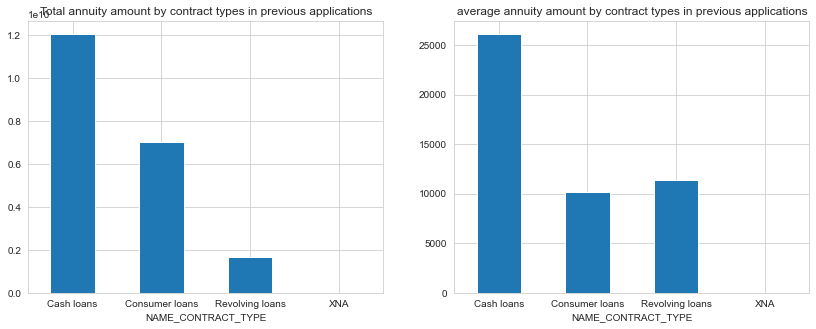

In [112]:
plt.figure(figsize=(14,5))
plt.subplot(121)
previous_application.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total annuity amount by contract types in previous applications")
plt.subplot(122)
previous_application.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].mean().plot(kind="bar")
plt.title("average annuity amount by contract types in previous applications")
plt.xticks(rotation=0)
plt.show()

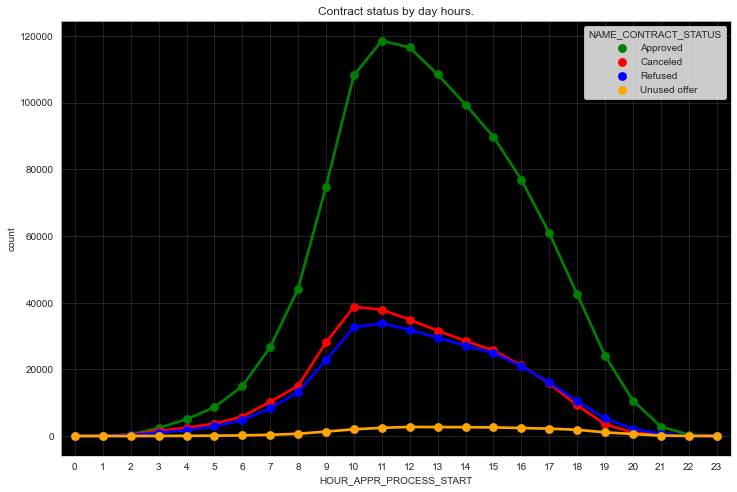

In [113]:
hr = pd.crosstab(previous_application["HOUR_APPR_PROCESS_START"],previous_application["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["HOUR_APPR_PROCESS_START"],hr[0],hue=hr["NAME_CONTRACT_STATUS"],palette=["g","r","b","orange"],scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Contract status by day hours.")
plt.grid(True,alpha=.2)

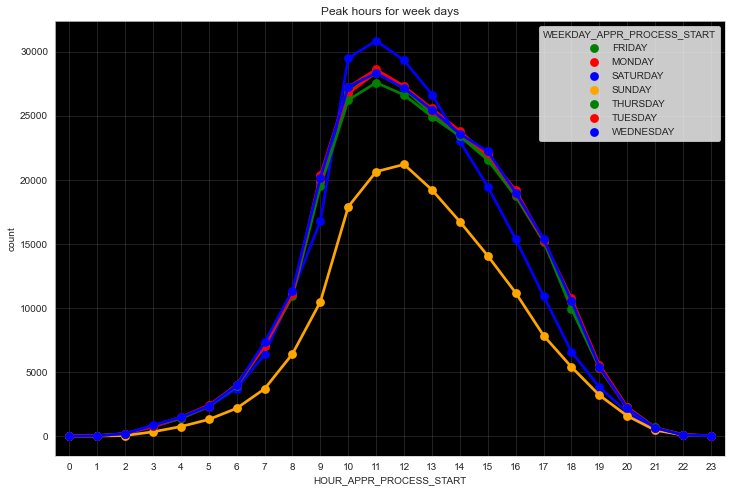

In [114]:
hr = pd.crosstab(previous_application["HOUR_APPR_PROCESS_START"],previous_application["WEEKDAY_APPR_PROCESS_START"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["HOUR_APPR_PROCESS_START"],hr[0],hue=hr["WEEKDAY_APPR_PROCESS_START"],palette=["g","r","b","orange"],scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Peak hours for week days")
plt.grid(True,alpha=.2)

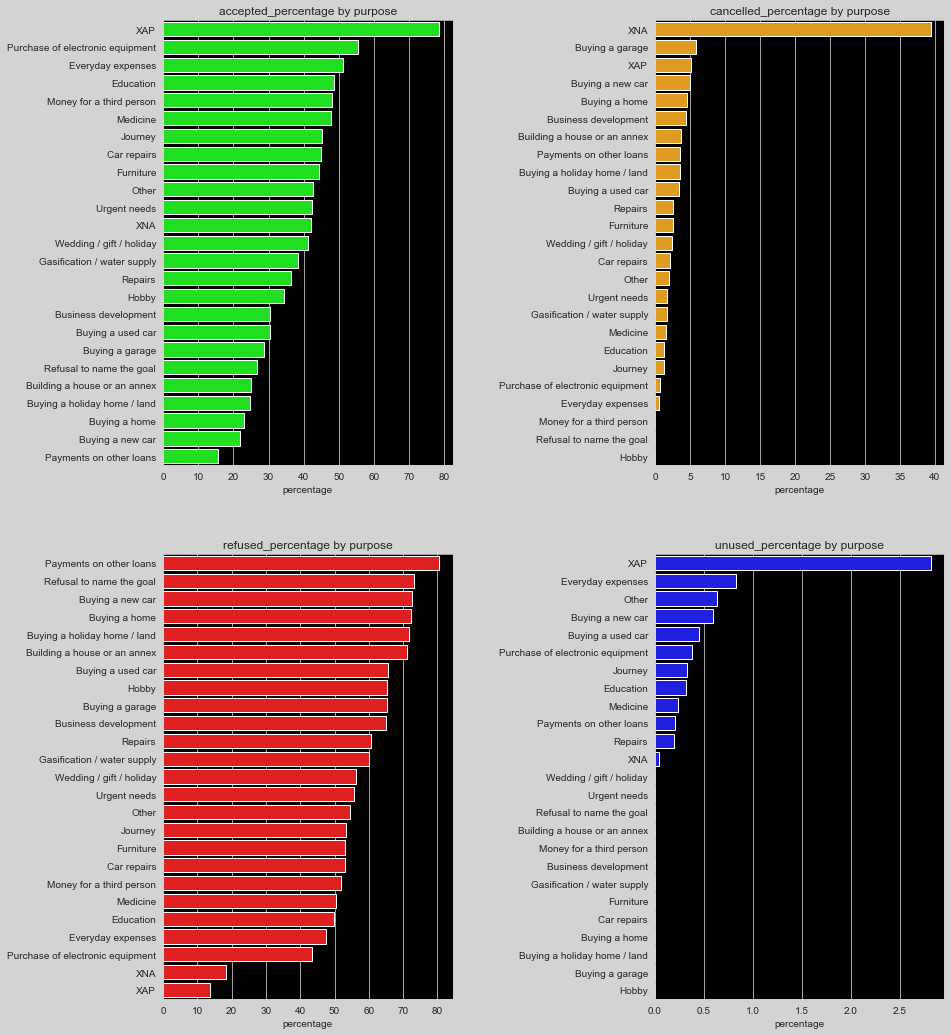

In [115]:
previous_application[["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS"]]
purpose = pd.crosstab(previous_application["NAME_CASH_LOAN_PURPOSE"],previous_application["NAME_CONTRACT_STATUS"])
purpose["a"] = (purpose["Approved"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["c"] = (purpose["Canceled"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["r"] = (purpose["Refused"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["u"] = (purpose["Unused offer"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose_new = purpose[["a","c","r","u"]]
purpose_new = purpose_new.stack().reset_index()
purpose_new["NAME_CONTRACT_STATUS"] = purpose_new["NAME_CONTRACT_STATUS"].replace({"a":"accepted_percentage","c":"cancelled_percentage",
                                                               "r":"refused_percentage","u":"unused_percentage"})

lst = purpose_new["NAME_CONTRACT_STATUS"].unique().tolist()
length = len(lst)
cs = ["lime","orange","r","b"]

fig = plt.figure(figsize=(14,18))
fig.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(lst,range(length),cs):
    plt.subplot(2,2,j+1)
    dat = purpose_new[purpose_new["NAME_CONTRACT_STATUS"] == i]
    ax = sns.barplot(0,"NAME_CASH_LOAN_PURPOSE",data=dat.sort_values(by=0,ascending=False),color=k)
    plt.ylabel("")
    plt.xlabel("percentage")
    plt.title(i+" by purpose")
    plt.subplots_adjust(wspace = .7)
    ax.set_facecolor("k")

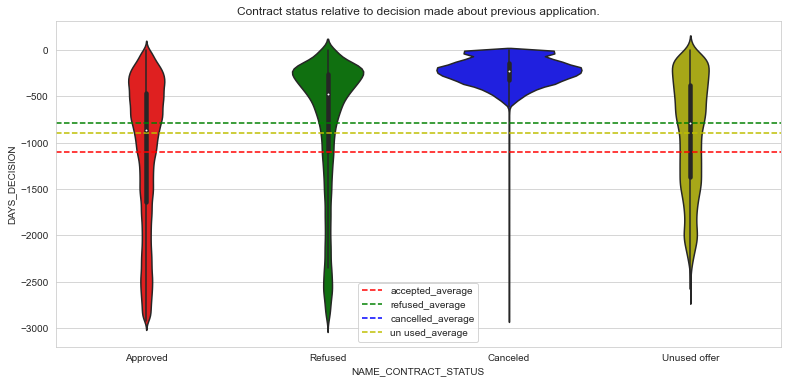

In [116]:
plt.figure(figsize=(13,6))
sns.violinplot(y= previous_application["DAYS_DECISION"],
               x = previous_application["NAME_CONTRACT_STATUS"],palette=["r","g","b","y"])
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Approved"]["DAYS_DECISION"].mean(),
            color="r",linestyle="dashed",label="accepted_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Refused"]["DAYS_DECISION"].mean(),
            color="g",linestyle="dashed",label="refused_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Cancelled"]["DAYS_DECISION"].mean(),color="b",
            linestyle="dashed",label="cancelled_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Unused offer"]["DAYS_DECISION"].mean(),color="y",
            linestyle="dashed",label="un used_average")
plt.legend(loc="best")

plt.title("Contract status relative to decision made about previous application.")
plt.show()

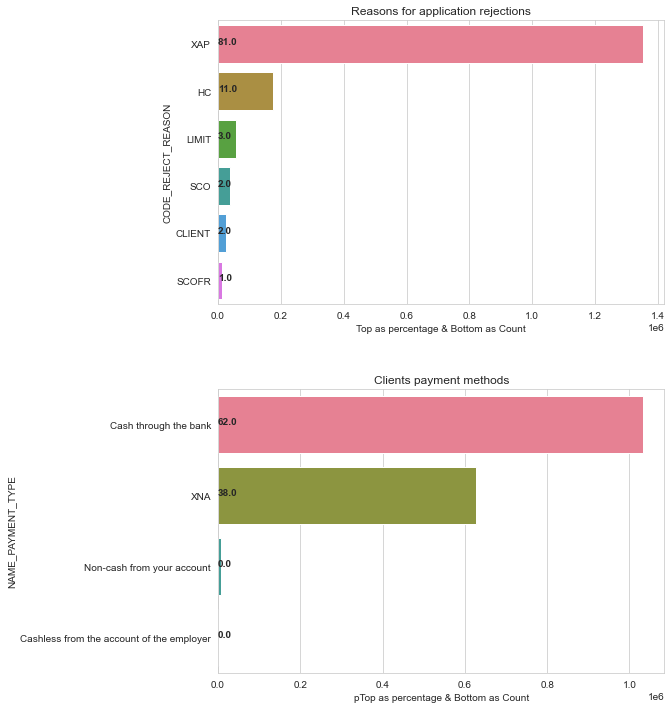

In [118]:


plt.figure(figsize=(8,12))
plt.subplot(211)
rej = previous_application["CODE_REJECT_REASON"].value_counts().reset_index()
ax = sns.barplot("CODE_REJECT_REASON","index",data=rej[:6],palette="husl")
for i,j in enumerate(np.around((rej["CODE_REJECT_REASON"][:6].values*100/(rej["CODE_REJECT_REASON"][:6].sum())))):
    ax.text(.7,i,j,weight="bold")
plt.xlabel("Top as percentage & Bottom as Count")
plt.ylabel("CODE_REJECT_REASON")
plt.title("Reasons for application rejections")

plt.subplot(212)
pay = previous_application["NAME_PAYMENT_TYPE"].value_counts().reset_index()
ax1 = sns.barplot("NAME_PAYMENT_TYPE","index",data=pay,palette="husl")
for i,j in enumerate(np.around((pay["NAME_PAYMENT_TYPE"].values*100/(pay["NAME_PAYMENT_TYPE"].sum())))):
    ax1.text(.7,i,j,weight="bold")
plt.xlabel("pTop as percentage & Bottom as Count")
plt.ylabel("NAME_PAYMENT_TYPE")
plt.title("Clients payment methods")
plt.subplots_adjust(hspace = .3)

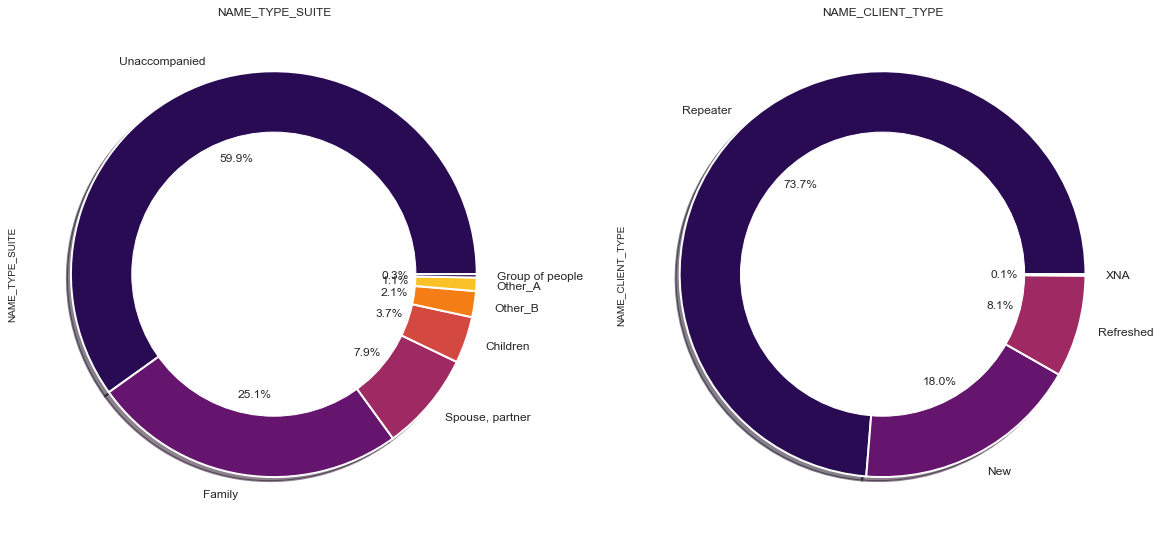

In [119]:
plt.figure(figsize=(20,20))
plt.subplot(121)
previous_application["NAME_TYPE_SUITE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("inferno"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_TYPE_SUITE")

plt.subplot(122)
previous_application["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("inferno"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_CLIENT_TYPE")
plt.show()

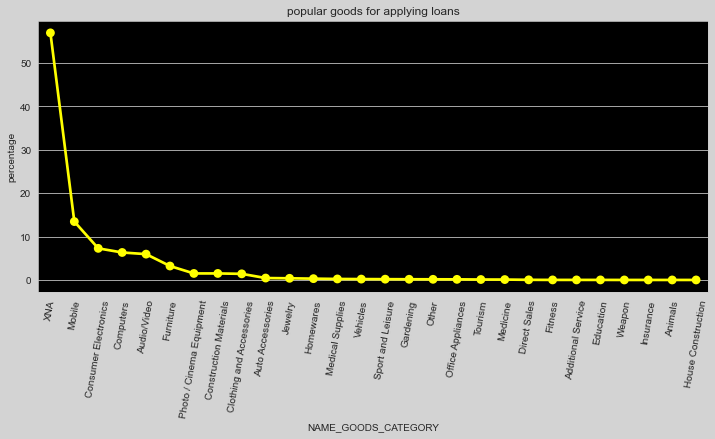

In [120]:
goods = previous_application["NAME_GOODS_CATEGORY"].value_counts().reset_index()
goods["percentage"] = round(goods["NAME_GOODS_CATEGORY"]*100/goods["NAME_GOODS_CATEGORY"].sum(),2)
fig = plt.figure(figsize=(12,5))
ax = sns.pointplot("index","percentage",data=goods,color="yellow")
plt.xticks(rotation = 80)
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("percentage")
plt.title("popular goods for applying loans")
ax.set_facecolor("k")
fig.set_facecolor('lightgrey')

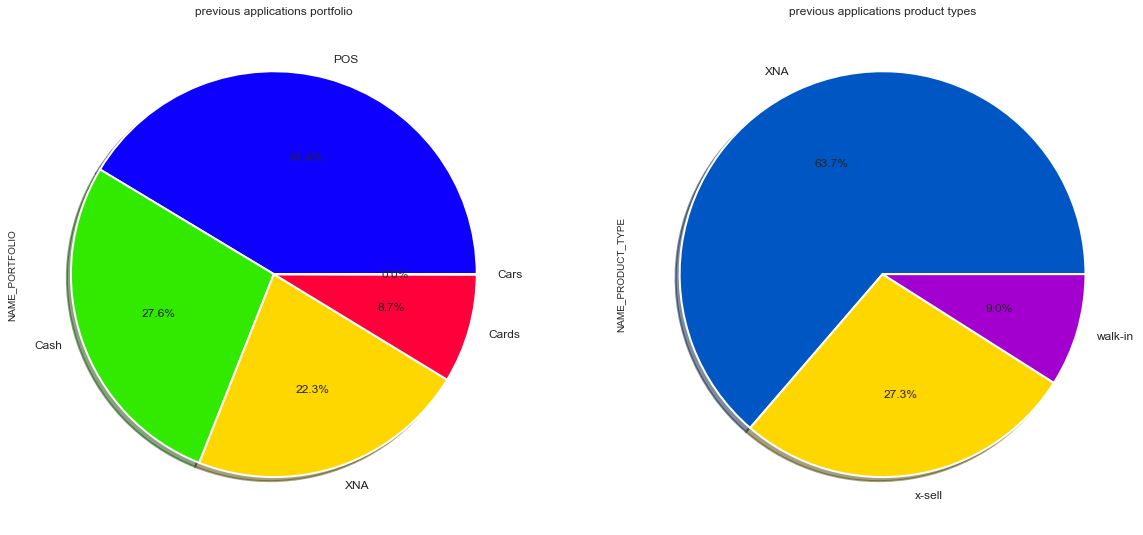

In [121]:
plt.figure(figsize=(20,20))
plt.subplot(121)
previous_application["NAME_PORTFOLIO"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("prism",5),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                               shadow =True)
plt.title("previous applications portfolio")
plt.subplot(122)
previous_application["NAME_PRODUCT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("prism",3),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                                  shadow =True)
plt.title("previous applications product types")
plt.show()

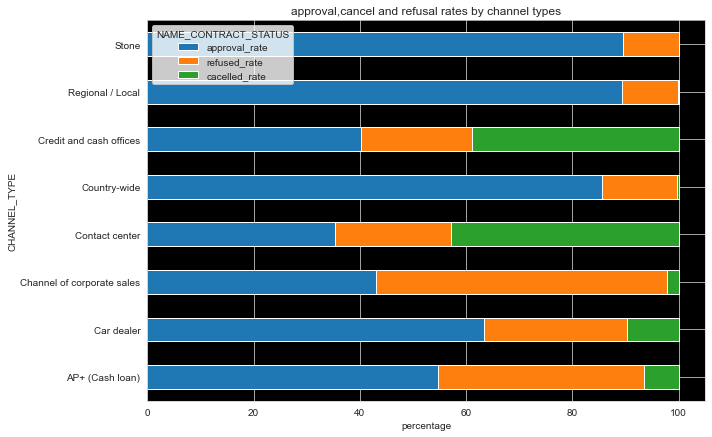

In [122]:
app = pd.crosstab(previous_application["CHANNEL_TYPE"],previous_application["NAME_CONTRACT_STATUS"])
app1 = app
app1["approval_rate"] = app1["Approved"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["refused_rate"]  = app1["Refused"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["cacelled_rate"] = app1["Canceled"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app2 = app[["approval_rate","refused_rate","cacelled_rate"]]
ax = app2.plot(kind="barh",stacked=True,figsize=(10,7))
ax.set_facecolor("k")
ax.set_xlabel("percentage")
ax.set_title("approval,cancel and refusal rates by channel types")
plt.show()

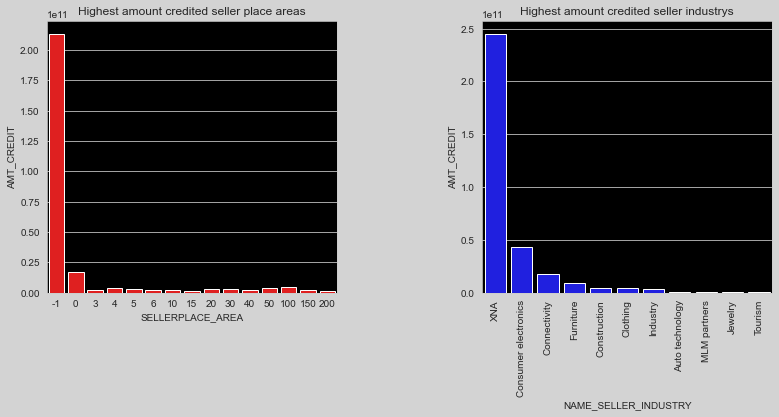

In [123]:
fig = plt.figure(figsize=(13,5))
plt.subplot(121)
are = previous_application.groupby("SELLERPLACE_AREA")["AMT_CREDIT"].sum().reset_index()
are = are.sort_values(by ="AMT_CREDIT",ascending = False)
ax = sns.barplot(y= "AMT_CREDIT",x ="SELLERPLACE_AREA",data=are[:15],color="r")
ax.set_facecolor("k")
ax.set_title("Highest amount credited seller place areas")

plt.subplot(122)
sell = previous_application.groupby("NAME_SELLER_INDUSTRY")["AMT_CREDIT"].sum().reset_index().sort_values(by = "AMT_CREDIT",ascending = False)
ax1=sns.barplot(y = "AMT_CREDIT",x = "NAME_SELLER_INDUSTRY",data=sell,color="b")
ax1.set_facecolor("k")
ax1.set_title("Highest amount credited seller industrys")
plt.xticks(rotation=90)
plt.subplots_adjust(wspace = .5)
fig.set_facecolor("lightgrey")

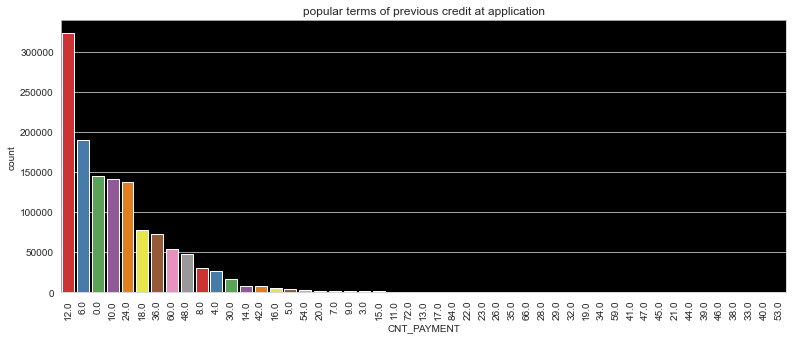

In [124]:
plt.figure(figsize=(13,5))
ax = sns.countplot(previous_application["CNT_PAYMENT"],palette="Set1",order=previous_application["CNT_PAYMENT"].value_counts().index)
ax.set_facecolor("k")
plt.xticks(rotation = 90)
plt.title("popular terms of previous credit at application")
plt.show()

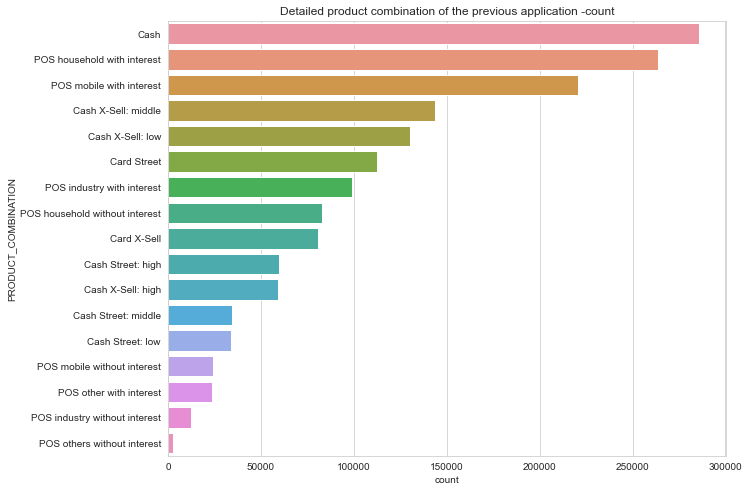

In [125]:
plt.figure(figsize=(10,8))
sns.countplot(y = previous_application["PRODUCT_COMBINATION"],order=previous_application["PRODUCT_COMBINATION"].value_counts().index)
plt.title("Detailed product combination of the previous application -count")
plt.show()

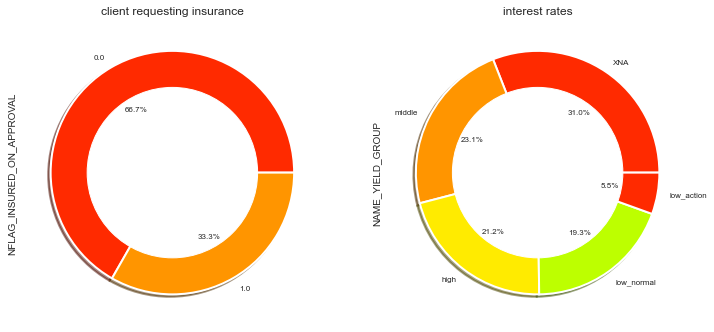

In [126]:
plt.figure(figsize=(12,6))
plt.subplot(121)
previous_application["NFLAG_INSURED_ON_APPROVAL"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("client requesting insurance")

plt.subplot(122)
previous_application["NAME_YIELD_GROUP"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("interest rates")
plt.show()

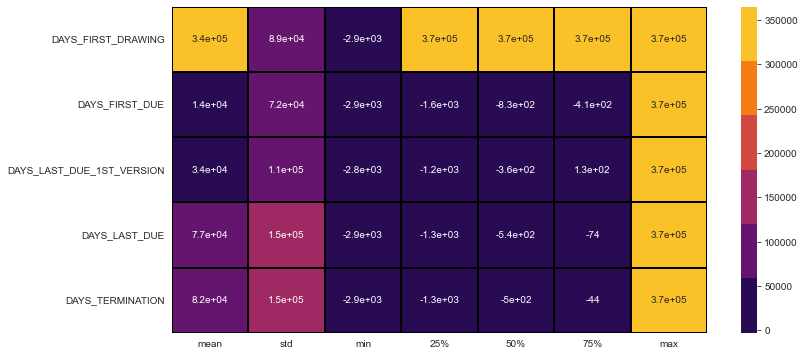

In [128]:
cols = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION']
plt.figure(figsize=(12,6))
sns.heatmap(previous_application[cols].describe()[1:].transpose(),
            annot=True,linewidth=2,linecolor="k",cmap=sns.color_palette("inferno"))
plt.show()

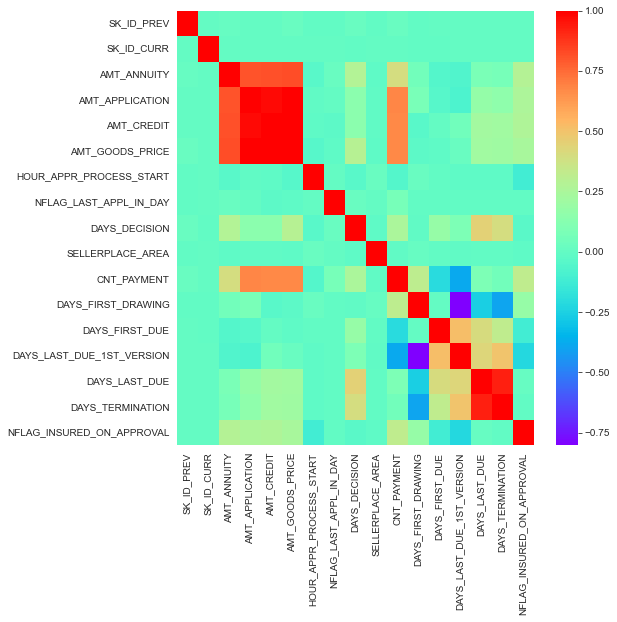

In [129]:
corrmat = previous_application.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

In [130]:
corrmat = previous_application.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
88,AMT_GOODS_PRICE,AMT_APPLICATION,1.00
89,AMT_GOODS_PRICE,AMT_CREDIT,0.99
71,AMT_CREDIT,AMT_APPLICATION,0.98
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.93
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.82
70,AMT_CREDIT,AMT_ANNUITY,0.82
53,AMT_APPLICATION,AMT_ANNUITY,0.81
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,0.80
173,CNT_PAYMENT,AMT_APPLICATION,0.68
174,CNT_PAYMENT,AMT_CREDIT,0.67


In [131]:
df_repayer = application_data[application_data['TARGET'] == 0]
df_defaulter = application_data[application_data['TARGET'] == 1]

In [132]:
corrmat = df_repayer.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
776,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
1798,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
358,AMT_GOODS_PRICE,AMT_CREDIT,0.99
1199,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
1064,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
1858,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
1439,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86
1619,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
359,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
299,AMT_ANNUITY,AMT_CREDIT,0.77


In [133]:
corrmat = df_defaulter.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
1798,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
776,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
358,AMT_GOODS_PRICE,AMT_CREDIT,0.98
1199,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
1064,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
1858,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
1439,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.85
1619,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78
299,AMT_ANNUITY,AMT_CREDIT,0.75
359,AMT_GOODS_PRICE,AMT_ANNUITY,0.75


In [135]:
mergeddf =  pd.merge(application_data,previous_application,on='SK_ID_CURR')
mergeddf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [136]:
y = mergeddf.groupby('SK_ID_CURR').size()
dfA = mergeddf.groupby('SK_ID_CURR').agg({'TARGET': np.sum})
dfA['count'] = y
display(dfA.head(10))

,TARGET,count
SK_ID_CURR,,
100002,1,1
100003,0,3
100004,0,1
100006,0,9
100007,0,6
100008,0,5
100009,0,7
100010,0,1
100011,0,4


In [137]:
dfA.sort_values(by = 'count',ascending=False).head(10)

,TARGET,count
SK_ID_CURR,,
265681,0,73
173680,0,72
242412,0,68
206783,0,67
389950,0,64
382179,0,64
198355,0,63
345161,0,62
446486,0,62


In [138]:
df_repayer = dfA[dfA['TARGET'] == 0]
df_defaulter = dfA[dfA['TARGET'] == 1]

In [139]:
df_repayer.sort_values(by = 'count',ascending=False).head(10)

,TARGET,count
SK_ID_CURR,,
265681,0,73
173680,0,72
242412,0,68
206783,0,67
382179,0,64
389950,0,64
198355,0,63
446486,0,62
345161,0,62


In [140]:

df_defaulter.sort_values(by = 'count',ascending=False).head(10)

,TARGET,count
SK_ID_CURR,,
100002,1,1
333349,1,1
333587,1,1
333582,1,1
333534,1,1
333506,1,1
333419,1,1
333355,1,1
333337,1,1
